## Market Research and Recommendation and Visualization Technique for Business Decision Making 

1. Data Preparation Test
2. Data Visualization Test
3. Basic Statistic Method Test

#### Data Importing and Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

template_style = 'plotly_white'
pio.renderers.default = 'svg'

df = pd.read_csv('data_retail.csv', sep=';')

In [2]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [4]:
df['Product'].unique()

array(['Jaket', 'Sepatu', 'Tas', 'Baju'], dtype=object)

In [5]:
# Converting the Product Name to English
prod_dict = {
    'Jaket' : 'Jacket',
    'Sepatu' : 'Shoe',
    'Tas' : 'Bag',
    'Baju' : 'Clothes'
}

df['Product'] = df['Product'].replace(prod_dict)

#### Data Cleansing

In [6]:
# Converting the First_Transaction Column Type to Datetime
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')

In [7]:
# Converting the Last_Transaction Column Type to Datetime
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


In [9]:
# Last Transaction in Dataset
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000128


In [10]:
# Classification of Churn Customer
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

In [11]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jacket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,2,29531,Shoe,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,3,141526,Bag,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jacket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,5,37545,Shoe,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [12]:
# Deleting Unnecessary Columns
del df['no']
del df['Row_Num']

In [13]:
df.columns

Index(['Customer_ID', 'Product', 'First_Transaction', 'Last_Transaction',
       'Average_Transaction_Amount', 'Count_Transaction', 'is_churn'],
      dtype='object')

#### Customer Acquisition by Year

In [14]:
# Make a Column Called Year_First_Transaction
df['Year_First_Transaction'] = df['First_Transaction'].dt.year

In [15]:
# Make a Column Called Year_Last_Transaction
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

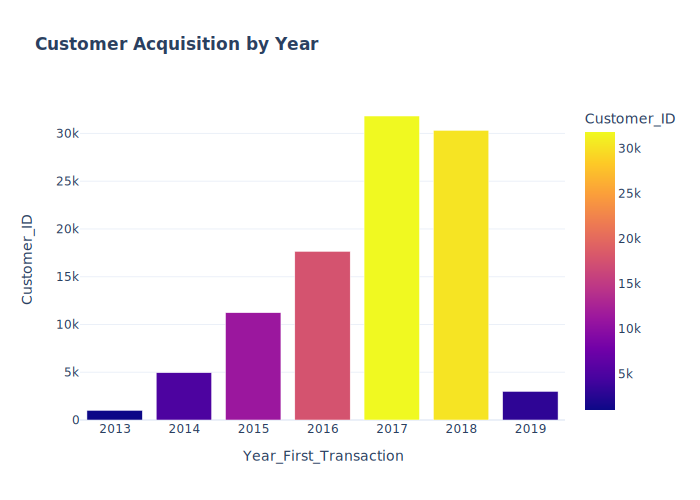

In [16]:
# Graph of Customer Acquisition
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
fig = px.bar(df_year,
             y='Customer_ID',
             title='<b>Customer Acquisition by Year<b>',
             color='Customer_ID',
             template=template_style)
fig.show()

#### Graph of Customer Transaction

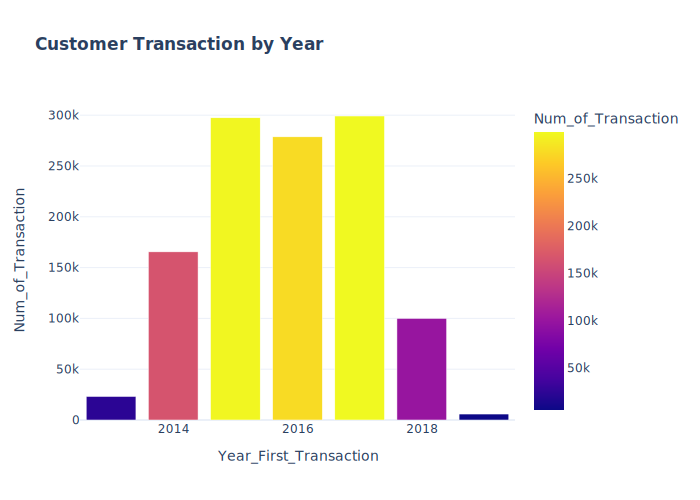

In [17]:
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
fig = px.bar(df_year,
             y='Count_Transaction',
             title='<b>Customer Transaction by Year<b>',
             color='Count_Transaction', 
             labels={'Count_Transaction':'Num_of_Transaction'},
             template=template_style)
fig.show()

#### Graph of Average Transaction Amount

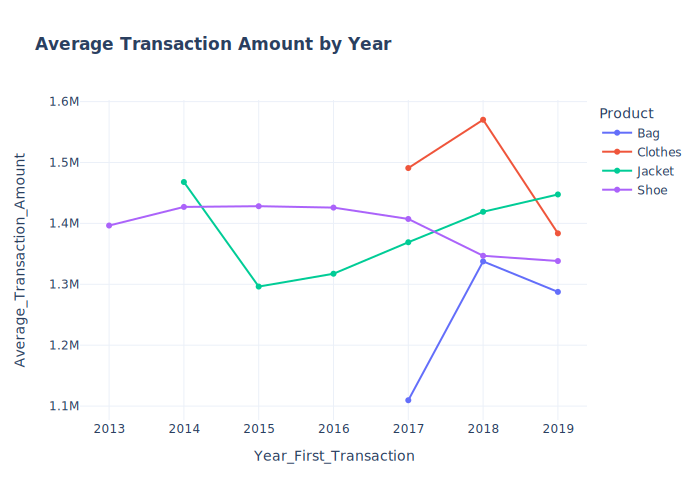

In [18]:
df_year = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index()
fig = px.line(df_year, 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              title='<b>Average Transaction Amount by Year<b>', 
              markers=True, 
              color='Product', 
              template=template_style)
fig.show()

#### Churned Customers' Proportions for Each Product

In [19]:
# Create Pivot Data
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product', 
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)

In [20]:
df_piv

Product,Bag,Clothes,Jacket,Shoe
is_churn,,,,
False,4976,1268,11123,16064
True,7508,2144,23827,33090


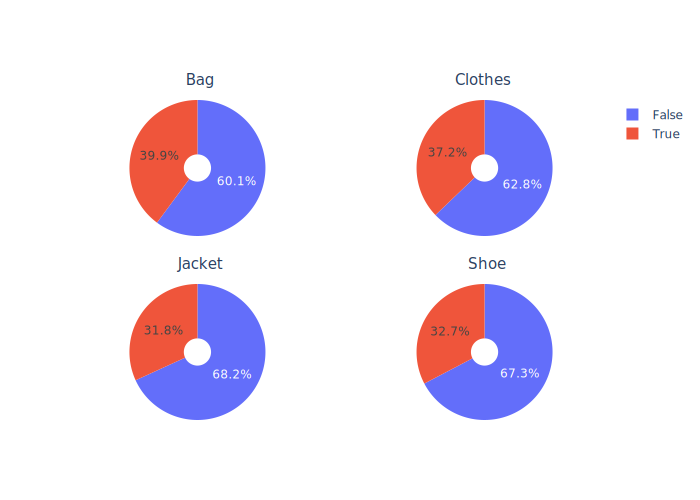

In [21]:
# Graph of Churned Customers' Proportions for Each Product
labels = ['True', 'False']
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs)

fig.add_trace(go.Pie(labels=labels, values=[4976, 7508], name='Bag'), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[1268, 2144], name='Clothes'), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=[11123, 23827], name='Jacket'), 2, 1)
fig.add_trace(go.Pie(labels=labels, values=[16064, 33090], name='Shoe'), 2, 2)

fig.update_traces(hole=.2, hoverinfo="label+percent+name")
fig.update_layout(
    annotations = [dict(text='Bag', x=0.20, y=1.1, font_size=15, showarrow=False), 
                   dict(text='Clothes', x=0.83, y=1.1, font_size=15, showarrow=False), 
                   dict(text='Jacket', x=0.18, y=0.49, font_size=15, showarrow=False), 
                   dict(text='Shoe', x=0.82, y=0.49, font_size=15, showarrow=False)])
fig.show()

#### Customer Distribution

In [22]:
#Make a Count Transaction Category
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val = '2-3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val = '4-6'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val = '7-10'
    else:
        val = '>10'
    return val

In [23]:
# Make a Column Called Count_Transaction_Group
df['Count_Transaction_Group'] = df.apply(func, axis=1)

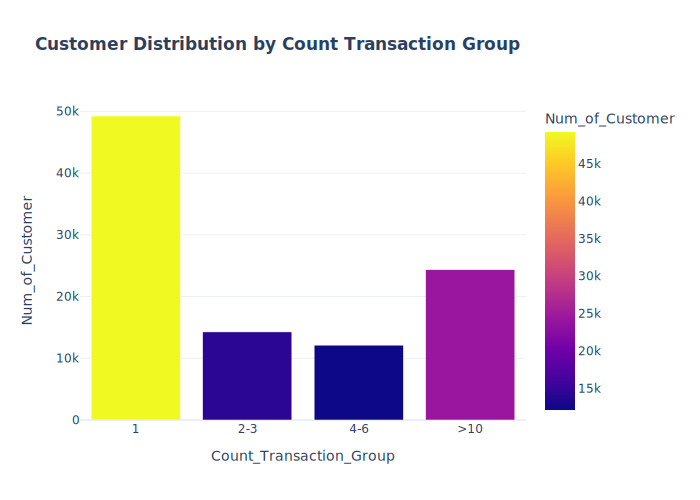

In [24]:
# Graph of Customer Distribution
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
fig = px.bar(df_year,
             y='Customer_ID',
             title='<b>Customer Distribution by Count Transaction Group<b>',
             color='Customer_ID', 
             labels={'Customer_ID':'Num_of_Customer'},
             template=template_style)
fig.show()

#### Average Transaction Amount

In [25]:
# Make an Average Transaction Amount Category
def func2(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 250000):
        val = '100K - 250K'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val = '250K - 500K'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '500K - 750K'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '750K - 1000K'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '1000K - 2500K'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '2500K - 5000K'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '5000K - 10000K'
    else:
        val = '>10000K'
    return val

In [26]:
# Make a Column Called Average_Transaction_Amount_Group
df['Average_Transaction_Amount_Group'] = df.apply(func2, axis=1)

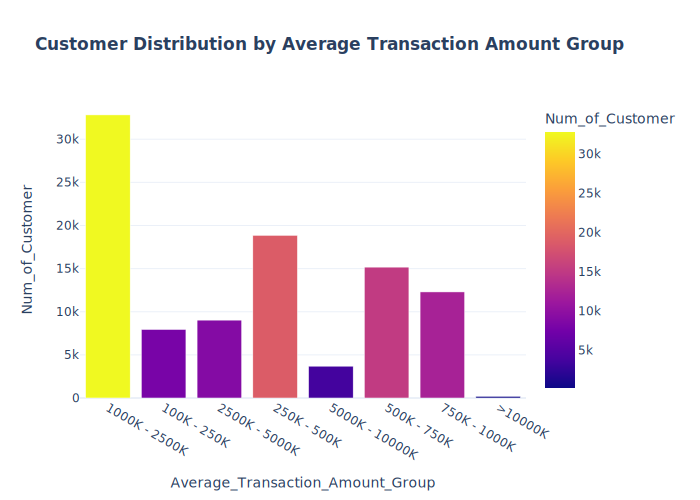

In [27]:
# Graph of Average Transaction Amount 
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
fig = px.bar(df_year,
             y='Customer_ID',
             title='<b>Customer Distribution by Average Transaction Amount Group<b>',
             color='Customer_ID', 
             labels={'Customer_ID':'Num_of_Customer'},
             template=template_style)
fig.show()

#### Machine Learning

In [28]:
# Make a Column Called Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

In [29]:
# List of Feature Columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

In [30]:
# Features Variable
X = df[feature_columns]

In [31]:
# Target Variable
y = df['is_churn']

In [32]:
# Converting y Variable Type
y = y.astype('int64')
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: is_churn
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


In [33]:
# Splitting the X and Y Variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
# Initiating the Model
logreg = LogisticRegression()

In [35]:
# Fit the Model with Data
logreg.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Predict Model
y_pred = logreg.predict(X_test)

In [37]:
# Evaluate the model using the Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[    1  8330]
 [    3 16666]]


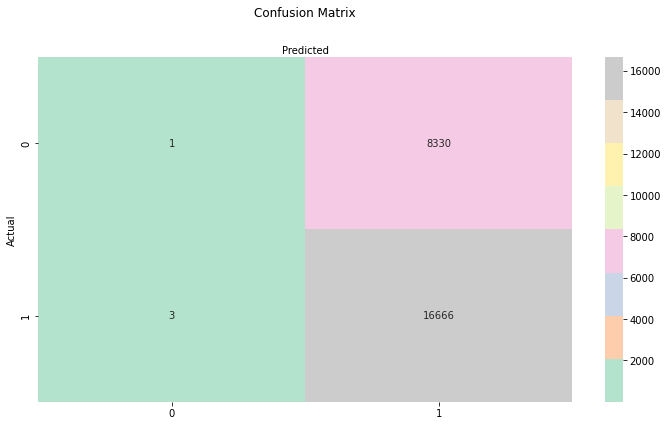

In [38]:
# Confusion Matrix Visualization
class_names= [0, 1]
fig, ax = plt.subplots(figsize=(10, 6))

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Pastel2', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [39]:
# Define Accuracy, Precision, Recall
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))

Accuracy: 0.66668
Precision: 0.66668
Recall: 0.66668
